<h1 style="display: flex; align-items: center;">
  WoMakersCode
  <img src="https://cdn-images-1.medium.com/v2/resize:fit:1200/1*B8rGvo7fJ7qL4uFJ_II_-w.png" alt="Python logo" width="30" style="margin-left: 10px;">
</h1>

<h1> 🦋Bootcamp Data Analytics🦋</h1>

## <font color = red>**Desafio Individual - Correlação e Regressão**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Bibliotecas básicas
import pandas as pd
import numpy as np
# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Bibliotecas/pacotes para estatísticas
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm
from scipy.stats import f_oneway
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings('ignore')
sns.set(style = "whitegrid")
%matplotlib inline
sns.set()

### Considerando a base de dados `kc_house_data.csv` responda as questões de 1 a 6 abaixo:

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Bootcamp Data Analytcs/dataset/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,n,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,n,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,n,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,n,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,n,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9999 non-null   int64  
 1   date           9999 non-null   object 
 2   price          9999 non-null   float64
 3   bedrooms       9999 non-null   int64  
 4   bathrooms      9999 non-null   float64
 5   sqft_living    9999 non-null   int64  
 6   sqft_lot       9999 non-null   int64  
 7   floors         9999 non-null   float64
 8   waterfront     9999 non-null   object 
 9   view           9999 non-null   int64  
 10  condition      9999 non-null   int64  
 11  grade          9999 non-null   int64  
 12  sqft_above     9999 non-null   int64  
 13  sqft_basement  9999 non-null   int64  
 14  yr_built       9999 non-null   int64  
 15  yr_renovated   9999 non-null   int64  
 16  zipcode        9999 non-null   int64  
 17  lat            9999 non-null   float64
 18  long    

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,9999.0,4.549550e+09,2.863859e+09,1.000102e+06,2.114001e+09,3.905010e+09,7.272001e+09,9.842301e+09
price,9999.0,5.334366e+05,3.770547e+05,7.500000e+04,3.150000e+05,4.458380e+05,6.399500e+05,7.700000e+06
bedrooms,9999.0,3.361636e+00,9.160787e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.100000e+01
bathrooms,9999.0,2.061806e+00,7.668836e-01,0.000000e+00,1.500000e+00,2.000000e+00,2.500000e+00,8.000000e+00
sqft_living,9999.0,2.053088e+03,9.112271e+02,3.800000e+02,1.410000e+03,1.890000e+03,2.500000e+03,1.205000e+04
sqft_lot,9999.0,1.603696e+04,4.504326e+04,5.720000e+02,5.427500e+03,7.920000e+03,1.117550e+04,1.651359e+06
floors,9999.0,1.432043e+00,5.118689e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.500000e+00
view,9999.0,2.388239e-01,7.667375e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,9999.0,3.446345e+00,6.663221e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
grade,9999.0,7.594459e+00,1.165901e+00,3.000000e+00,7.000000e+00,7.000000e+00,8.000000e+00,1.300000e+01


In [ ]:
# Converter colunas de data e hora para formato datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

### 1. Codifique e exiba a matriz de correlação entre as variáveis numéricas. Além disso, qual é a correlação entre o preço price e o número de quartos bedrooms? Existe alguma diferença na correlação quando consideramos apenas casas com uma área total sqft_living superior a 2000 pés quadrados?

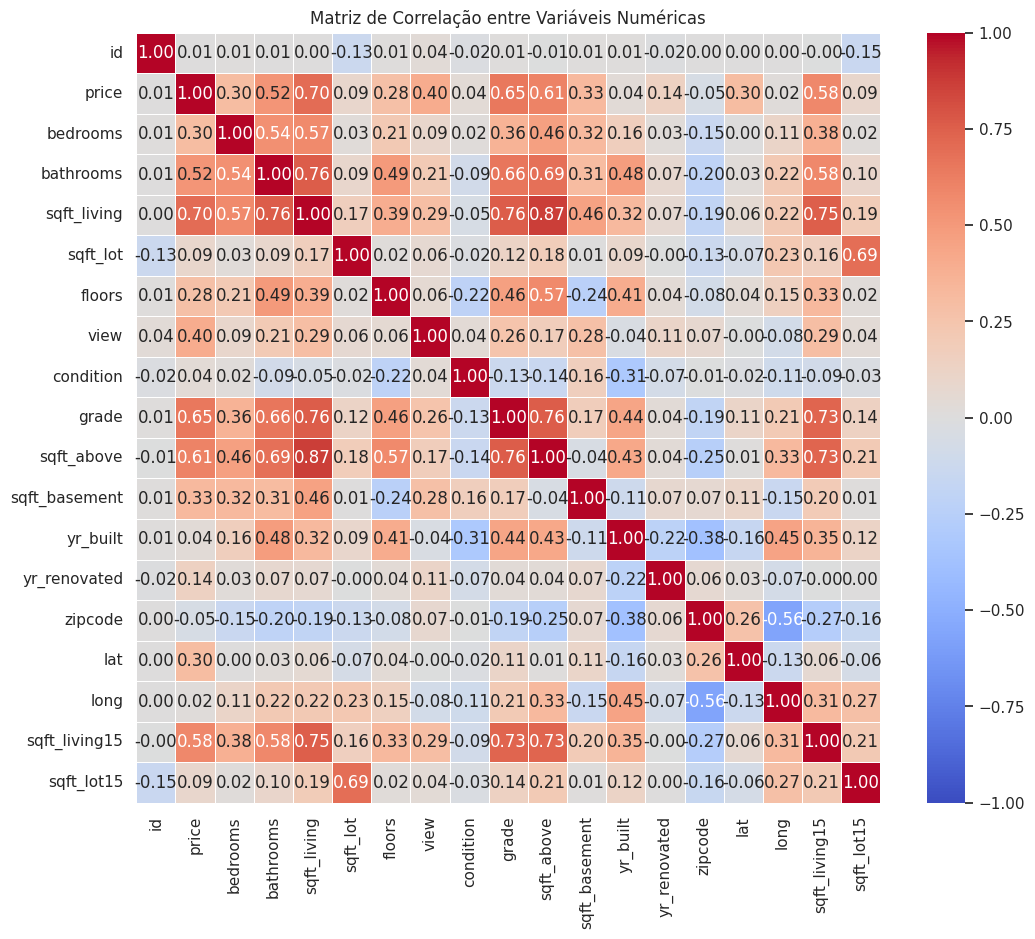

In [ ]:
# Selecionar apenas as colunas numéricas
numeric_df = df.select_dtypes(include=['float64', 'int64'])
## calcula a matriz de correlação
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

In [ ]:
# Correlação entre 'price' e 'bedrooms' para todos os dados
price_bedrooms_corr = df['price'].corr(df['bedrooms'])
print(f"Correlação entre 'price' e 'bedrooms': {price_bedrooms_corr:.2f}")

# Correlação entre 'price' e 'bedrooms' para casas com 'sqft_living' > 2000
correlation_filtered = df[df['sqft_living'] > 2000]['price'].corr(df[df['sqft_living'] > 2000]['bedrooms'])
print(f"Correlação entre 'price' e 'bedrooms' para casas com 'sqft_living' > 2000: {correlation_filtered:.2f}")

Correlação entre 'price' e 'bedrooms': 0.30
Correlação entre 'price' e 'bedrooms' para casas com 'sqft_living' > 2000: 0.12


 ### Interpretando os resultados:

- <font color='red'> 0.30 indica uma correlação moderada, é um coeficiente de correlação positivo, o que significa que, em média, conforme o número de quartos (bedrooms) aumenta, o preço (price) também tende a aumentar.</font>

- <font color='red'> E  coeficiente de correlação 0.12 é próximo de zero, indicando uma relação linear muito fraca entre price e bedrooms em casas com sqft_living maior que 2000. Isso sugere que a quantidade de quartos não é um bom preditor para o preço dessas casas.</font>

### 2. Existe alguma correlação entre o preço price e a área total da casa sqft_living, considerando apenas casas com pelo menos dois banheiros bathrooms?

In [ ]:
# Calcular e exibir a correlação entre 'price' e 'sqft_living' para casas com pelo menos 2 banheiros
correlation_filtered = df[df['bathrooms'] >= 2]['price'].corr(df[df['bathrooms'] >= 2]['sqft_living'])
print(f"Correlação entre 'price' e 'sqft_living' para casas com pelo menos 2 banheiros: {correlation_filtered:.2f}")

Correlação entre 'price' e 'sqft_living' para casas com pelo menos 2 banheiros: 0.71


 ### Interpretando os resultados:

- <font color='red'>  0.71 indica uma relação linear forte entre price e sqft_living em casas com pelo menos 2 banheiros. Isso significa uma variável importante para prever o preço de casas com pelo menos 2 banheiros. Assim, quanto maior a área habitável, maior é a tendência de aumento do preço das casas.</font>



### 3. Como a quantidade de banheiros bathrooms influencia na correlação entre a área total da casa sqft_living e o preço price?

Matriz de correlação entre 'price', 'sqft_living' e 'bathrooms':
                price  sqft_living  bathrooms
price        1.000000     0.702199   0.521193
sqft_living  0.702199     1.000000   0.764810
bathrooms    0.521193     0.764810   1.000000


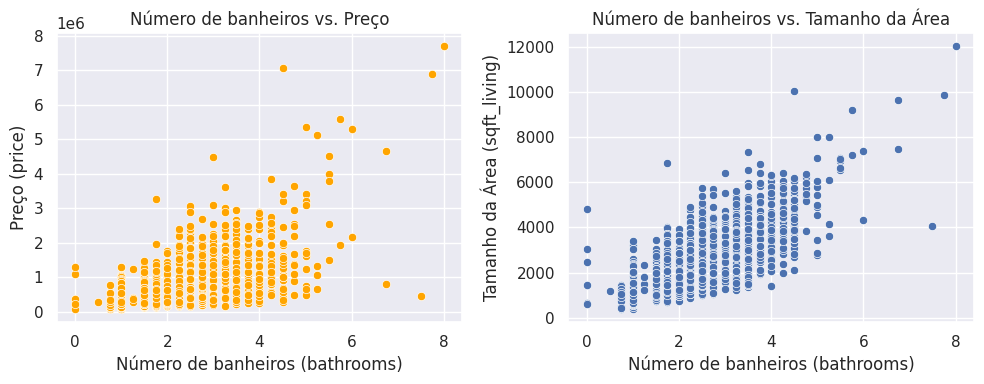

In [ ]:
# Calcular a correlação entre 'price', 'sqft_living' e 'bathrooms'
print("Matriz de correlação entre 'price', 'sqft_living' e 'bathrooms':")
print(df[['price', 'sqft_living', 'bathrooms']].corr())

# Gráfico de dispersão entre 'bathrooms' e 'price'
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x='bathrooms', y='price', data=df, color='orange')
plt.xlabel('Número de banheiros (bathrooms)')
plt.ylabel('Preço (price)')
plt.title('Número de banheiros vs. Preço')

# Gráfico de dispersão entre 'bathrooms' e 'sqft_living'
plt.subplot(1, 2, 2)
sns.scatterplot(x='bathrooms', y='sqft_living', data=df)
plt.xlabel('Número de banheiros (bathrooms)')
plt.ylabel('Tamanho da Área (sqft_living)')
plt.title('Número de banheiros vs. Tamanho da Área')

plt.tight_layout()
plt.show()

###  4. Qual é a relação entre a condição da casa condition e o preço price, considerando apenas casas com uma área total sqft_living superior a 3000 pés quadrados?

In [ ]:
# Filtrar o DataFrame para incluir apenas casas com 'sqft_living' > 3000
area_total_3000 = df[df['sqft_living'] > 3000]

# Calcular a correlação entre 'condition' e 'price' para o DataFrame filtrado
correlation = area_total_3000['condition'].corr(area_total_3000['price'])
print(f"Correlação entre 'condition' e 'price' para casas com área construída maior que 3000 sqft: {correlation:.2f}")

Correlação entre 'condition' e 'price' para casas com área construída maior que 3000 sqft: 0.11


 ### Interpretando os resultados:

- <font color='red'>  0.11 indica uma  correlação fraca sugere que a condição da casa não tem uma influência significativa sobre o preço das casas com mais de 3000 sqft de área construída.</font>


### 5. Existe alguma correlação entre a localização geográfica lat e long e o preço price para casas com pelo menos três quartos bedrooms?

Correlação entre 'price' e 'lat': 0.31
Correlação entre 'price' e 'long': -0.01


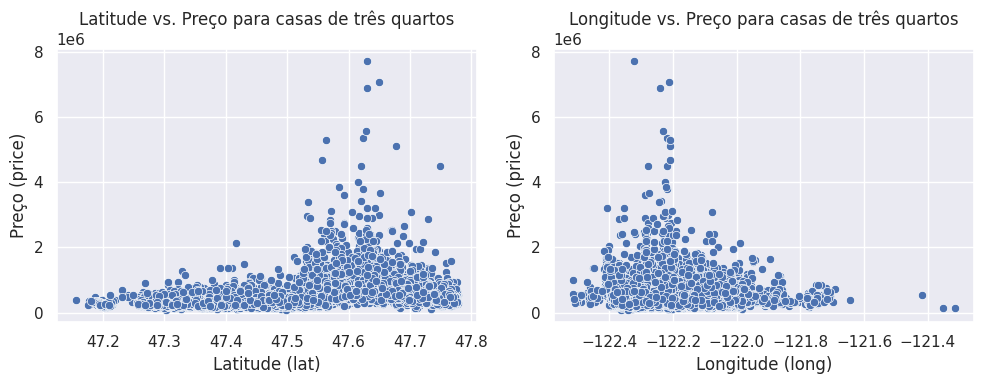

In [ ]:
# Filtrar o dataframe para incluir apenas casas com pelo menos três quartos
casas_3_quartos = df[df['bedrooms'] >= 3]

# Calcular a correlação entre 'price' e 'lat' e 'long' para casas com pelo menos três quartos
correlation_lat = casas_3_quartos['price'].corr(casas_3_quartos['lat'])
correlation_long = casas_3_quartos['price'].corr(casas_3_quartos['long'])

# Exibir correlações
print(f"Correlação entre 'price' e 'lat': {correlation_lat:.2f}")
print(f"Correlação entre 'price' e 'long': {correlation_long:.2f}")

# Análise visual: Gráfico de dispersão entre 'lat' e 'price' para casas com pelo menos três quartos
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x='lat', y='price', data=casas_3_quartos)
plt.xlabel('Latitude (lat)')
plt.ylabel('Preço (price)')
plt.title('Latitude vs. Preço para casas de três quartos')

# Análise visual: Gráfico de dispersão entre 'lat' e 'price' para casas com pelo menos três quartos
plt.subplot(1, 2, 2)
sns.scatterplot(x='long', y='price', data=casas_3_quartos)
plt.xlabel('Longitude (long)')
plt.ylabel('Preço (price)')
plt.title('Longitude vs. Preço para casas de três quartos')

plt.tight_layout()
plt.show()

 ### Interpretando os resultados:

- <font color='red'>   0.31 entre price e lat indica uma relação linear moderada entre o preço e a latitude, ou seja, mais ao norte, o preço também tende a aumentar.</font>

- <font color='red'>  -0.01 entre price e long indica uma relação linear muito fraca ou praticamente inexistente entre o preço e a longitude, localização leste-oeste (longitude) das casas não está relacionada com os preços </font>

### 6. Calcule a correlação entre uma variável categórica(waterfront) e uma variável numérica(price) usando ANOVA.

In [ ]:
# Separar os preços com base na variável categórica 'waterfront'
prices = [df[df['waterfront'] == i]['price'] for i in df['waterfront'].unique()]

# Realizar o teste ANOVA
f_stat, p_value = f_oneway(*prices)

# Exibir os resultados
print(f"Teste ANOVA: F-estatística = {f_stat:.2f}, p-valor = {p_value:.2f}")

Teste ANOVA: F-estatística = 964.57, p-valor = 0.00


 ### Interpretando os resultados:

- <font color='red'> p-valor de 0.00 indica uma relação estatisticamente significativa entre waterfront e price. Ou seja, a presença ou ausência de waterfront (se a casa está ou não à beira-mar) tem uma influência significativa sobre o preço das casas.</font>




### Considerando a base de dados car_price.csv responda as questões de 7 a 11 abaixo:

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/Bootcamp Data Analytcs/dataset/car_price.csv")
df2.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1874 non-null   object 
 1   Model               1874 non-null   object 
 2   Price               1874 non-null   int64  
 3   Year                1874 non-null   int64  
 4   Kilometer           1874 non-null   int64  
 5   Fuel Type           1874 non-null   object 
 6   Transmission        1874 non-null   object 
 7   Location            1874 non-null   object 
 8   Color               1874 non-null   object 
 9   Owner               1874 non-null   object 
 10  Seller Type         1874 non-null   object 
 11  Engine              1874 non-null   object 
 12  Max Power           1874 non-null   object 
 13  Max Torque          1874 non-null   object 
 14  Drivetrain          1874 non-null   object 
 15  Length              1874 non-null   float64
 16  Width 

In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1874.0,1.718279e+06,2.426090e+06,49000.0,500000.00,842499.5,1908250.00,35000000.0
Year,1874.0,2.016713e+03,3.138477e+00,1988.0,2015.00,2017.0,2019.00,2022.0
Kilometer,1874.0,5.317814e+04,5.878833e+04,0.0,28019.75,48797.5,71000.00,2000000.0
Length,1874.0,4.281513e+03,4.362207e+02,3099.0,3985.00,4360.0,4620.00,5569.0
Width,1874.0,1.767886e+03,1.313449e+02,1475.0,1695.00,1770.0,1831.00,2220.0
Height,1874.0,1.588968e+03,1.346277e+02,1213.0,1485.00,1544.0,1670.75,1995.0
Seating Capacity,1874.0,5.295091e+00,8.070084e-01,2.0,5.00,5.0,5.00,8.0
Fuel Tank Capacity,1874.0,5.221734e+01,1.516725e+01,15.0,42.00,50.0,60.00,105.0


### 7. Codifique e exiba a Matriz de correlação para as variáveis numéricas e dê exemplos de correlações positivas, negativas e neutras.

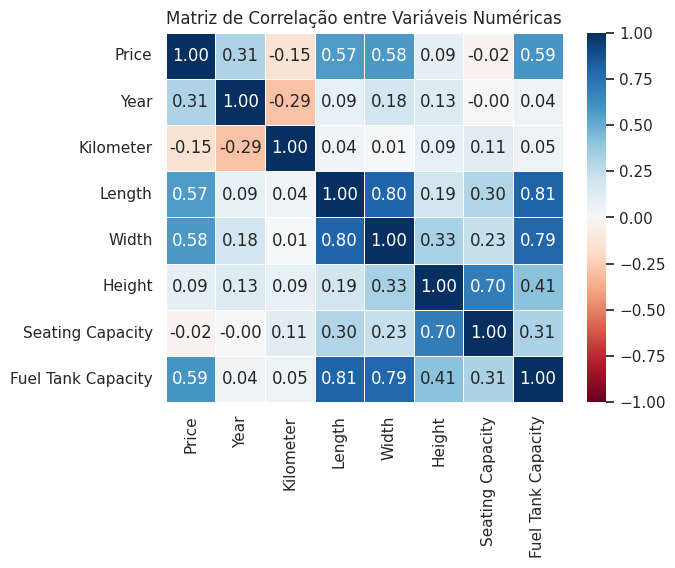

In [ ]:
# Filtrar o dataframe para incluir apenas variáveis numéricas
numeric_df2 = df2.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação para as variáveis numéricas
corr_matrix_d2 = numeric_df2.corr()

# Exibir a matriz de correlação com sns.heatmap
sns.heatmap(corr_matrix_d2, annot=True, cmap='RdBu', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

In [ ]:
correlation_d2 = corr_matrix_d2["Price"].sort_values(ascending = False)
correlation_d2

Price                 1.000000
Fuel Tank Capacity    0.586109
Width                 0.577100
Length                0.568875
Year                  0.309381
Height                0.092968
Seating Capacity     -0.024879
Kilometer            -0.147276
Name: Price, dtype: float64

In [ ]:
print(f"As correlações positivas com o preço são:\n{correlation_d2[1:5]}")

As correlações positivas com o preço são:
Fuel Tank Capacity    0.586109
Width                 0.577100
Length                0.568875
Year                  0.309381
Name: Price, dtype: float64


In [ ]:
print(f"As correlações negativas com o preço são:\n{correlation_d2[-2:]}")

As correlações negativas com o preço são:
Seating Capacity   -0.024879
Kilometer          -0.147276
Name: Price, dtype: float64


In [ ]:
print(f"A correlação neutra com o preço são:\n{correlation_d2[5:6]}")

A correlação neutra com o preço são:
Height    0.092968
Name: Price, dtype: float64


### 8. Codifique e exiba Gráficos de Dispersão para cada uma das variáveis numéricas em relação à variável de interesse Price.

In [ ]:
top_variaveis = correlation_d2[1:5].index

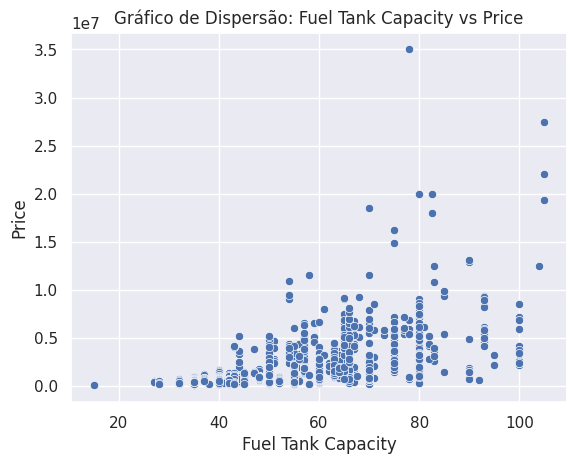

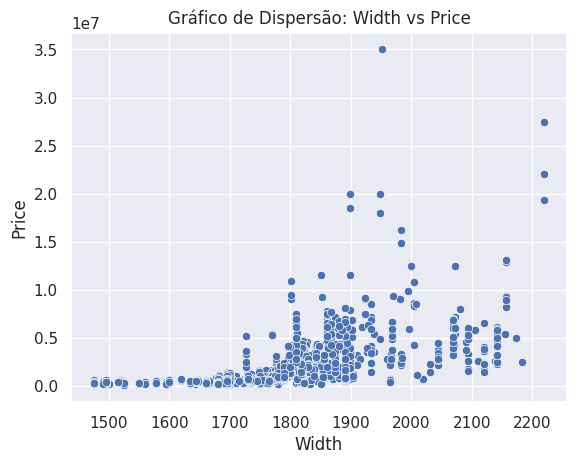

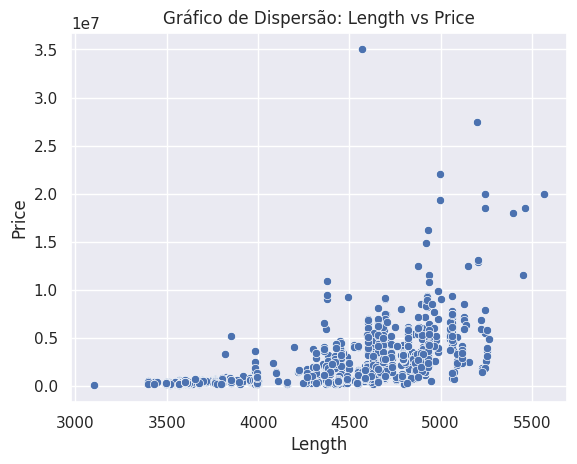

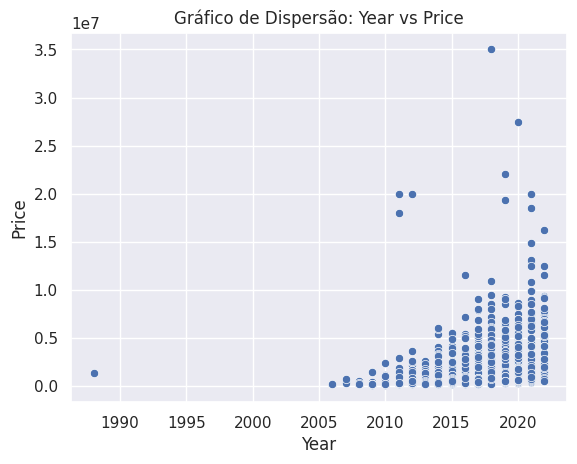

In [ ]:
# Variável de interesse
price_var = 'Price'

# Criar gráficos de dispersão para cada variável numérica em relação à variável de interesse Price
for var in top_variaveis:
    sns.scatterplot(x=var, y=price_var, data=df2)
    plt.title(f'Gráfico de Dispersão: {var} vs {price_var}')
    plt.xlabel(var)
    plt.ylabel(price_var)
    plt.show()

### 9. Crie um modelo de Regressão Linear Simples, exiba a Tabela de Regressão e exiba o plot da Reta Estimada.

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     198.1
Date:                Thu, 09 May 2024   Prob (F-statistic):           7.48e-43
Time:                        22:58:19   Log-Likelihood:                -30115.
No. Observations:                1874   AIC:                         6.023e+04
Df Residuals:                    1872   BIC:                         6.025e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.806e+08   3.43e+07    -14.026      0.0

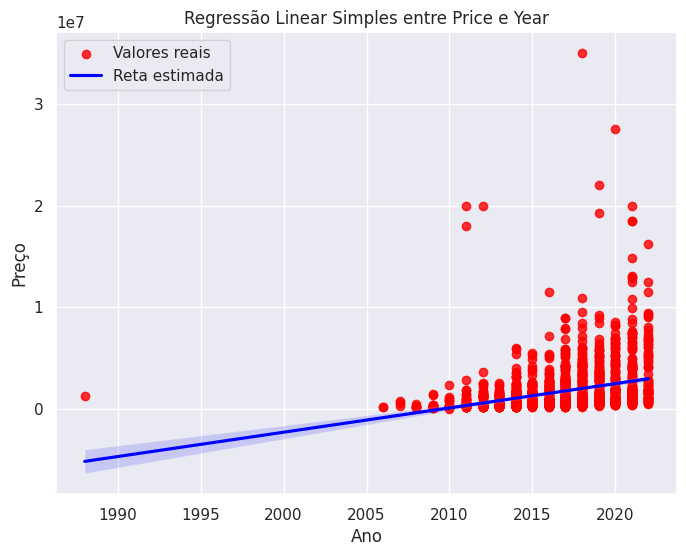

In [ ]:
y_train = df2['Price']  # Variável dependente
X_train = df2[['Year']]  # Variável independente

# Adicionar uma constante a X_train
X_train_with_const = sm.add_constant(X_train)

# Criar um modelo de regressão linear simples
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Prever valores com base em X_train
y_pred = regressor.predict(X_train)

# Criar Tabela de Regressão
model = sm.OLS(y_train, X_train_with_const).fit()
print(model.summary())

# Gráfico de dispersão entre X_train e y_train com reta estimada
plt.figure(figsize=(8, 6))
sns.regplot(x=X_train['Year'], y=y_train, data=df2, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.title('Regressão Linear Simples entre Price e Year')
plt.legend(['Valores reais', 'Reta estimada'])
plt.show()

### 10. Codifique e exiba o gráfico dos resíduos do modelo de Regressão Simples.

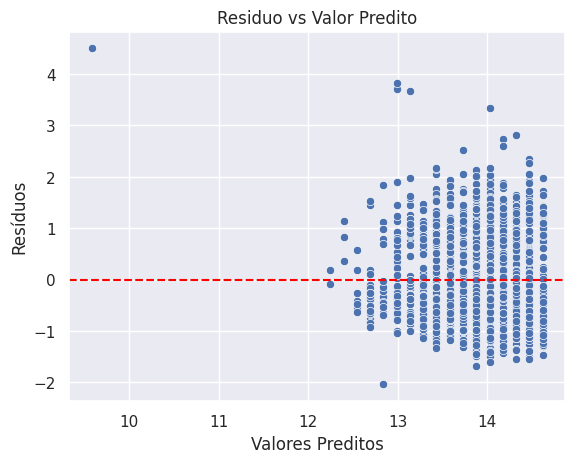

In [ ]:
# Calcular os resíduos
residuals = model.resid
predicted_values = model.fittedvalues

# Criar gráfico dos resíduos
sns.scatterplot(x=predicted_values, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')

# Definir título e rótulos
plt.title('Residuo vs Valor Predito')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.show()

### 11. Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão e exiba o gráfico dos resíduos do modelo.

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     378.3
Date:                Thu, 09 May 2024   Prob (F-statistic):          8.18e-239
Time:                        23:33:53   Log-Likelihood:                -29654.
No. Observations:                1874   AIC:                         5.932e+04
Df Residuals:                    1869   BIC:                         5.935e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -4.088e+08   2.75

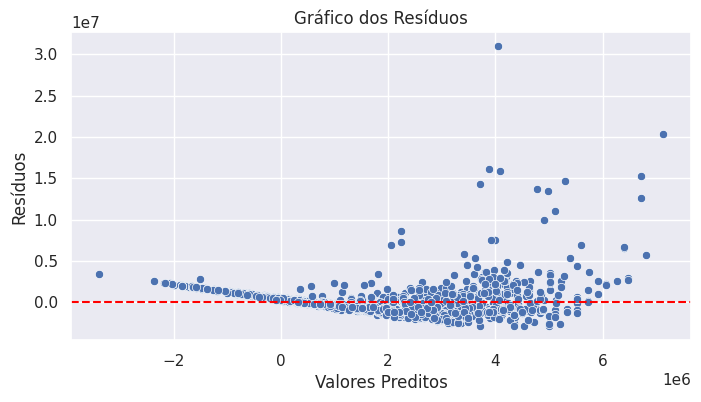

In [ ]:
# Criação do modelo multivariado
X = sm.add_constant(df2[top_variaveis])  # Adiciona uma constante às variáveis independentes
y = df2['Price']

# Ajustar o modelo de regressão multivariada
model = sm.OLS(y, X).fit()

# Exibir a tabela de regressão
print(model.summary())

# Criar gráfico dos resíduos
plt.figure(figsize=(8, 4))
sns.scatterplot(x=model.fittedvalues, y=model.resid)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico dos Resíduos')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.show()